Ideas:
- Andres: 
  - Trend of categories throughout the years. Which topics were the most famous throughout time, how interests have changed for people, and why.
  - Trend of topics throughout the years. Important events, political events, etc… (Maybe with llms based on the titles, tags and comments)
  - Finding what controversies were the most famous throughout time.
  - Finding what controversies made a youtuber fall or rise in popularity.
  - If the anonymous comments have ids, we can find social graphs, like with which categories does each user interact and see which topics or categories can have connections.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## DF_channels data

In [2]:
df_channels = pd.read_csv('df_channels_en.tsv', sep='\t')
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435


In [3]:
len(df_channels["category_cc"].unique())

16

## DF timseries data

In [4]:
df_timeseries = pd.read_csv('df_timeseries_en.tsv', sep='\t')
df_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [5]:
len(df_timeseries["channel"].unique())

133516

In [6]:
# check the types of each column
df_timeseries.dtypes

channel          object
category         object
datetime         object
views           float64
delta_views     float64
subs            float64
delta_subs      float64
videos            int64
delta_videos      int64
activity          int64
dtype: object

In [7]:
df_timeseries['datetime'] = pd.to_datetime(df_timeseries['datetime'])
df_timeseries['year'] = df_timeseries['datetime'].dt.year

# remove nan categories
df_timeseries = df_timeseries.dropna(subset=['category'])

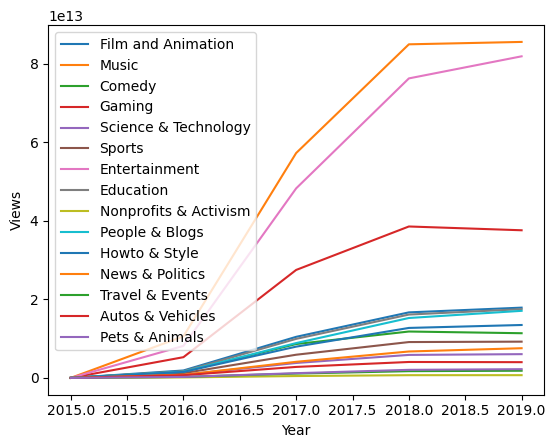

In [8]:
# visulaize the amount of views through time for each category
# df_timeseries = df_timeseries.set_index('datetime')


# df_timeseries[df_timeseries['category'] == 'Gaming'].groupby(
#     'year')['views'].sum().plot(kind='bar')

# df_timeseries[df_timeseries['category'] == 'Music'].groupby('year')['views'].sum().plot(kind='bar')

for category in df_timeseries['category'].unique():
    plt.plot(df_timeseries[df_timeseries['category'] == category].groupby('year')['views'].sum())

# plt.yscale('log')

plt.legend(df_timeseries['category'].unique())
plt.xlabel('Year')
plt.ylabel('Views')

plt.show()


In [9]:
# do a scatter matrix just for some columns
# pd.plotting.scatter_matrix(df_timeseries[['views', 'year', 'subs', 'videos']], alpha=0.2)

## DF num comments authors

In [10]:
df_comments = pd.read_csv('num_comments_authors.tsv', sep='\t')

In [11]:
df_comments

,author,video_id
0,1,5
1,2,3
2,3,2
3,4,6
4,5,3
...,...,...
448810478,576552010,5
448810479,576552011,7
448810480,576552012,3
448810481,576552019,3


In [12]:
# group by video_id and get the sum of comments based on author
df_comments_count = df_comments['video_id'].value_counts()
df_comments_count

video_id
1        165176537
2         65032632
3         36355694
4         24011819
5         17334312
           ...    
22968            1
51659            1
78549            1
9471             1
18658            1
Name: count, Length: 15231, dtype: int64

In [13]:
df_comments['video_id'].max()

352020

## DF yt metadata

In [14]:
json_file_path = "yt_metadata_en.jsonl"

# Read the first 1000 rows using chunksize
df_metatadata = pd.read_json(json_file_path, lines=True, nrows=100_000)

df_metatadata


/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_69022/1868544102.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_metatadata = pd.read_json(json_file_path, lines=True, nrows=100_000)


ValueError: Expected object or value

In [ ]:
df_metatadata['upload_date'] = pd.to_datetime(df_metatadata['upload_date'])
df_metatadata['year'] = df_metatadata['upload_date'].dt.year

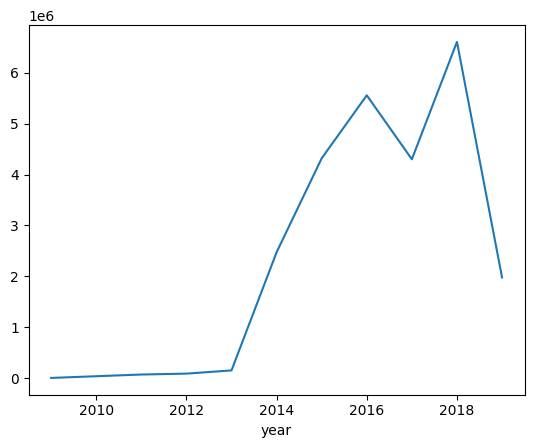

In [ ]:
df_metatadata[df_metatadata['tags'].apply(lambda x: 'climate change' in x)].groupby('year')[
    'view_count'].sum().plot()

plt.show()

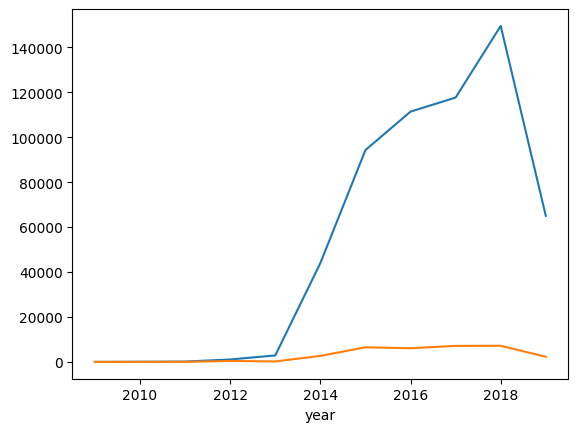

In [ ]:
df_metatadata[df_metatadata['tags'].apply(lambda x: 'climate change' in x)].groupby('year')[
    'like_count'].sum().plot()
df_metatadata[df_metatadata['tags'].apply(lambda x: 'climate change' in x)].groupby('year')[
    'dislike_count'].sum().plot()

plt.show()

In [ ]:
def process_large_json_in_chunks(file_path, chunksize=1_000_000):
    # Initialize variables for counting lines and other calculations
    total_rows = 0
    sum_column = 0  # Example of a calculation: summing a column

    # It seems with chunksize you specify the number of rows you want to read

    
    # Use pandas to read JSON file in chunks
    for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
        total_rows += len(chunk)
        # Example: sum values from a column (replace 'your_column' with actual column name)

        sum_column += chunk['view_count'].sum()

        print(total_rows)
        
    return total_rows, sum_column

# Example usage
total_rows, sum_column = process_large_json_in_chunks(json_file_path, chunksize=1_000_000)
print(f"Total rows: {total_rows}, Sum of column: {sum_column}")

72_924_794 rows in total in yt_metadata_en.jsonl file

In [ ]:
ksdfjoiqjwoiqjf

## convert to parquet file the json file

In [ ]:
# now read the complete metadata json file in chunks and save it to a parquet file
# read in chunks and save to parquet
chunksize = 1_000_000
parquet_file_path = "yt_metadata_en.parquet"

# Use pandas to read JSON file in chunks
for i, chunk in enumerate(pd.read_json(json_file_path, lines=True, chunksize=chunksize)):
    print(f"Processing chunk {i}")
    if i == 0:
        chunk.to_parquet(parquet_file_path)
    else:
        chunk.to_parquet(parquet_file_path, engine="fastparquet", append=True)



/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_77017/2861908236.py:7: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  for i, chunk in enumerate(pd.read_json(json_file_path, lines=True, chunksize=chunksize)):


ValueError: Expected object or value

In [3]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

# Read the parquet file
pq_metadata = pq.ParquetFile(parquet_file_path)

# Get the number of rows
df_metadata = pd.DataFrame()
rows = 0
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    if rows == 1:
        df_metadata = batch.to_pandas()
        break
    rows += 1

In [4]:
df_metadata

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:35.608354,http://manhattan-products.com/en-US/products/9...,1.0,DKdAFfKUUks,583,8.0,"KTrinh93,Manhattan,Stealth,Touch,Mouse,Wireless",Manhattan Stealth Touch Mouse Review,2012-08-29 00:00:00,677.0
1,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:36.267474,http://www.bbpbags.com\nMy review for the DSLR...,1.0,TnYDpxjTy1s,564,2.0,"KTrinh93,BBP,DSLR,Slinger,Bag,Review,Canon,Nik...",BBP DSLR Slinger Bag Review,2012-08-29 00:00:00,424.0
2,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:36.857239,http://www.idaptweb.com/universal_chargers/i4/...,2.0,961y9wGgaeo,512,1.0,"KTrinh93,IDAPT,i4,Universal,Charger,Review,App...",IDAPT i4 Universal Charger Review,2012-08-29 00:00:00,675.0
3,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:37.574401,http://www.hellolulu.us/Emmerson-Large-DSLR-Ca...,1.0,cMRphs4_mxY,497,3.0,"KTrinh93,Hellolulu,Emmerson,Large,DSLR,Camera,...",Hellolulu Emmerson Large DSLR Bag Review,2012-08-29 00:00:00,268.0
4,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:38.175035,http://www.60beat.com/product_p/gp001.htm\nMy ...,2.0,JFPJqSVyxJo,280,15.0,"KTrinh93,60Beat,GamePad,Review,iPod,iPhone,iPa...",60beat GamePad Review,2012-08-29 00:00:00,2577.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Entertainment,UCqWhKZdJrvy0yHAamjWQkCA,2019-11-13 20:26:43.792553,Charge those energems & go behind the scenes o...,20.0,DCEKf6VZwVw,110,432.0,"Power Rangers,Saban,Dino Super Charge,Dino Cha...",Power Rangers Dino Super Charge | Power Morphi...,2016-08-22 00:00:00,66797.0
999996,Entertainment,UCqWhKZdJrvy0yHAamjWQkCA,2019-11-13 20:26:44.467783,The Power Rangers Dino Super Charge cast is re...,30.0,hlkLSpc6D54,13,363.0,"Power Rangers,Dino Super Charge,Dino Charge,Re...",Power Rangers - Dino Super Charge Is Back!,2016-08-18 00:00:00,127881.0
999997,Entertainment,UCqWhKZdJrvy0yHAamjWQkCA,2019-11-13 20:26:45.044307,"Davi Santos, Power Rangers Dino Super Charge G...",7.0,BiA2Hy2ryH8,45,131.0,"Power Rangers,Dino Super Charge,Dino Charge,Ni...",Meet the Cast: What do you do in your free time?,2016-08-18 00:00:00,20306.0
999998,Entertainment,UCqWhKZdJrvy0yHAamjWQkCA,2019-11-13 20:26:45.638840,Shelby’s lifelong friend takes credit for a so...,9.0,UkJ74iRXxsQ,107,378.0,"Power Rangers,Dino Super Charge,Dino Charge,Ni...",Power Rangers - Exclusive Clip - Dino Super Ch...,2016-08-17 00:00:00,81561.0


In [5]:
total_rows = pq_metadata.metadata.num_rows
print(f"Total rows: {total_rows}")

Total rows: 72924794


In [ ]:
df_metadata['upload_date'] = pd.to_datetime(df_metadata['upload_date'])
df_metadata['year'] = df_metadata['upload_date'].dt.year
df_metadata["month"] = df_metadata["upload_date"].dt.month
df_metadata['day'] = df_metadata['upload_date'].dt.day

In [1]:
import pandas as pd

In [ ]:
# read the filtered parquet file
filtered_df = pd.read_parquet("filtered_sport_metadata(by_tags_and_title)_withoud_description.parquet", engine="fastparquet")

In [ ]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)
 
# Initialize an empty DataFrame to store the filtered data
filtered_df = pd.DataFrame()

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas().drop(columns=['description'])
    temp_df = temp_df[temp_df.apply(lambda row: any(tag in row['tags'].lower() for tag in ['sport', 'football', 'soccer', 'fifa', 'nba', 'olympic', 'golf', 'tennis', 'cricket', 'formula1', 'f1', 'basketball', 'nascar', 'nfl', 'world cup', 'eurocup', 'superbowl']) or any(tag in row['title'].lower() for tag in ['sport', 'football', 'soccer', 'fifa', 'olympic', 'golf', 'tennis', 'cricket', 'formula1', 'f1', 'basketball', 'nascar', 'nfl', 'world cup', 'eurocup', 'superbowl']), axis=1)]
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    print(f"Current size of filtered_df: {filtered_df.shape}")
    print(f"Memory usage of filtered_df: {filtered_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

# print(filtered_df)

Find a correlation of peaks in the number of views and events, and if interest in sports is going to maintain throughout time.

See the impacts of sports in content engagement.

In [ ]:
filtered_df

,upload_date,view_count,like_count,dislike_count,tags,categories,title,year,month,day
0,2017-06-04,12760.0,24.0,5.0,"lego dinosaurs,lego jurssic world,lego jurassi...",Gaming,Lego Dinosaurs Lego Jurassic World Dinosaur Tr...,2017,6,4
1,2016-02-09,9888.0,180.0,1.0,"marina del rey,sportsfishing,charter,fishing c...",Sports,Marina Del Rey Sportsfishing Charter - Catch S...,2016,2,9
2,2015-09-22,304856.0,2323.0,83.0,"livewell,live well,bait,fishing,fish,bluegill ...",Sports,Secret fish bait and $8 portable livewell,2015,9,22
3,2015-03-28,15250.0,130.0,20.0,"Pufferfish (Organism Classification),puffer fi...",Education,Puffer fish fail! Puffer fish gets gas - funny...,2015,3,28
4,2014-08-31,3646.0,47.0,0.0,"live bait,keep live bait alive,transporting li...",Education,How to keep live bait alive while moving spots,2014,8,31
...,...,...,...,...,...,...,...,...,...,...
5462833,2019-04-26,149.0,11.0,0.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",News & Politics,ये देश का चुनाव है। देश के चुनाव में सेना भी ह...,2019,4,26
5462834,2019-04-26,270.0,14.0,1.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",News & Politics,"2014 में हेडलाइन बनती थी महंगाई, अब महंगाई पर ...",2019,4,26
5462835,2019-10-01,1397.0,55.0,3.0,"BJP,Bharatiya Janata Party,Narendra Modi,#Mann...",News & Politics,PM Modi pays tribute to Mahatma Gandhi On his ...,2019,10,1
5462836,2019-09-28,3635.0,210.0,12.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",News & Politics,"Pakistan thrives on conflict, can never welcom...",2019,9,28


In [ ]:
filtered_df.to_parquet("filtered_sport_metadata(by_tags_and_title)_withoud_description.parquet", engine="fastparquet")

In [ ]:
# save the file without the gaming category
filtered_df_without_gaming = filtered_df[~filtered_df['category'].str.contains('Gaming')]

filtered_df_without_gaming.to_parquet("filtered_sport_metadata(by_tags_and_title)_without_gaming_category.parquet", engine="fastparquet")

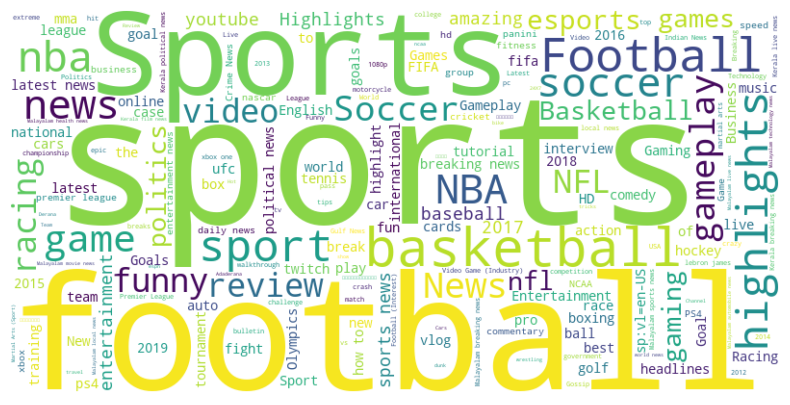

In [5]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_df['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

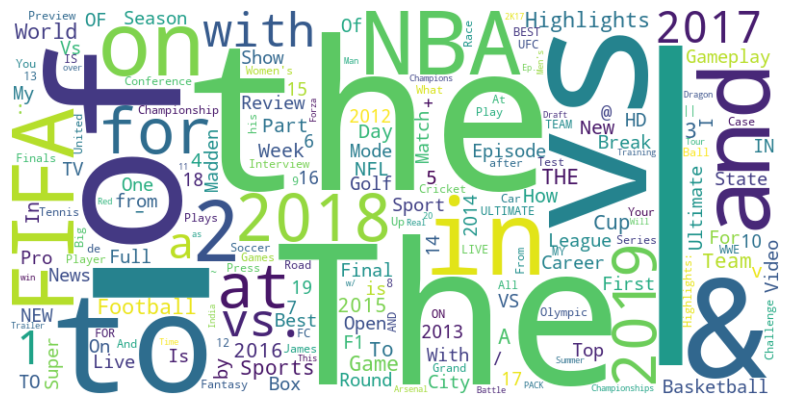

In [6]:
all_titles = [title for title in filtered_df['title'].str.split(' ').tolist() for title in title]

# Count the frequency of each tag
tag_counts = Counter(all_titles)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
filtered_df['upload_date'] = pd.to_datetime(filtered_df['upload_date'])
filtered_df['year'] = filtered_df['upload_date'].dt.year
filtered_df["month"] = filtered_df["upload_date"].dt.month
filtered_df['day'] = filtered_df['upload_date'].dt.day

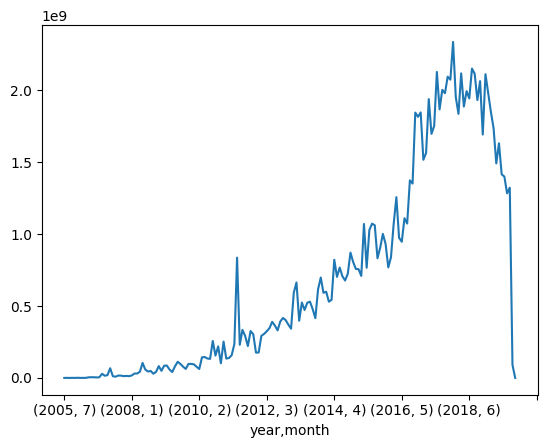

In [8]:
filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby(['year', 'month'])[
    'view_count'].sum().plot()

plt.show()

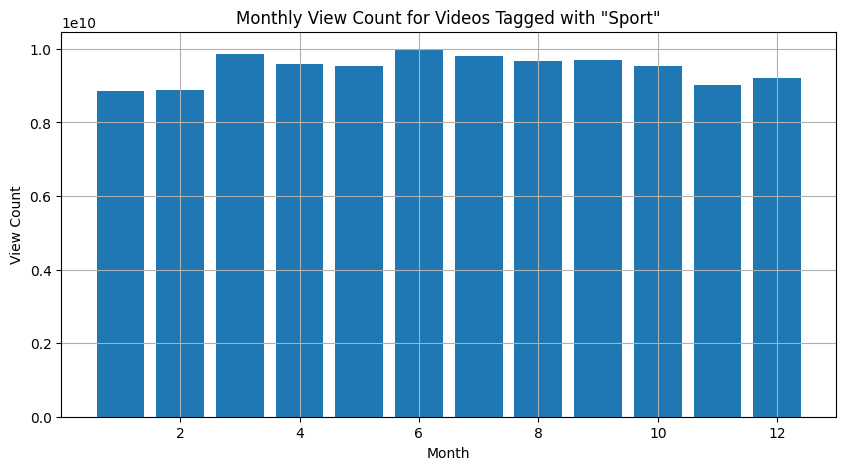

In [9]:
import matplotlib.pyplot as plt

# Group the data by month and sum the view counts
monthly_views = filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby('month')['view_count'].sum()

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(monthly_views.index, monthly_views.values)
plt.xlabel('Month')
plt.ylabel('View Count')
plt.title('Monthly View Count for Videos Tagged with "Sport"')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

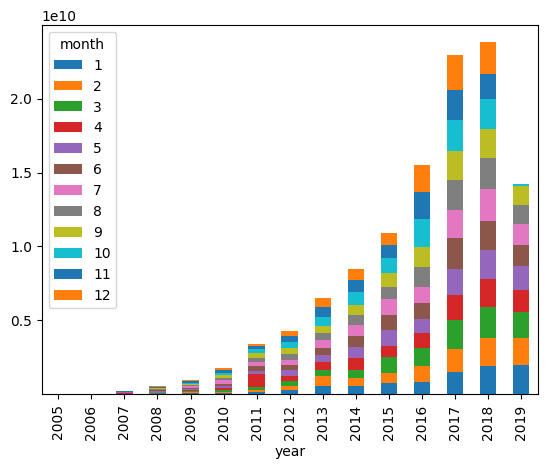

In [10]:

year_monthly_view = filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby(["year", "month"])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))

year_monthly_view.unstack().plot(kind='bar', stacked=True)

plt.show()

In [8]:
def plot_view_counts_by_subject(filtered_df, subjects):
    # Filter the data for tags containing any of the subjects

    subject_data = filtered_df[filtered_df.apply(lambda row: any(subject.lower() in row['tags'].lower() for subject in subjects) or any(subject.lower() in row['title'].lower() for subject in subjects), axis=1)]

    # Group the data by year and month and sum the view counts
    year_monthly_view_subject = subject_data.groupby(['year', 'month'])['view_count'].sum()

    # Unstack the data to get a DataFrame suitable for plotting
    year_monthly_view_subject_unstacked = year_monthly_view_subject.unstack()

    # Plot the data
    plt.figure(figsize=(12, 6))
    for year in year_monthly_view_subject_unstacked.index:
        plt.plot(year_monthly_view_subject_unstacked.columns, year_monthly_view_subject_unstacked.loc[year], label=year)

    plt.xlabel('Month')
    plt.ylabel('View Count')
    plt.title(f'Monthly View Count for Videos Tagged with {", ".join(subjects)}')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()


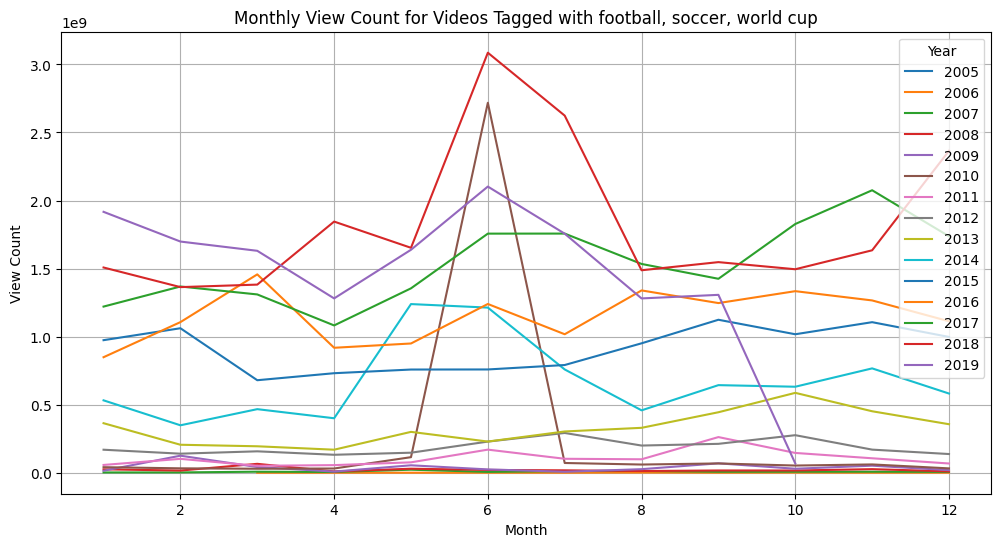

In [9]:
plot_view_counts_by_subject(filtered_df, ['football', 'soccer', 'world cup'])

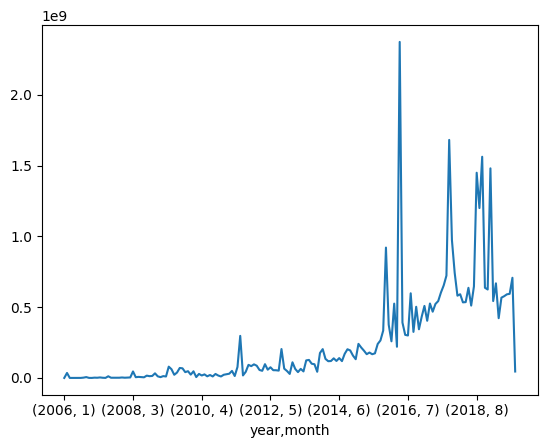

In [12]:
filtered_df[filtered_df['tags'].apply(lambda x: 'american football' in x or 'nfl' in x)].groupby(["year", "month"])[
    'view_count'].sum().plot()

plt.show()

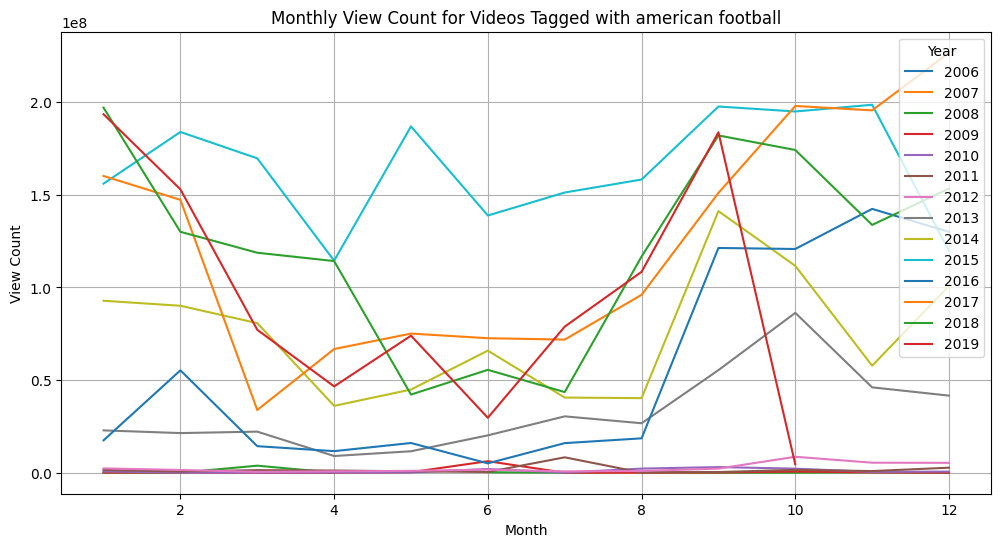

In [10]:
plot_view_counts_by_subject(filtered_df, ['american football'])

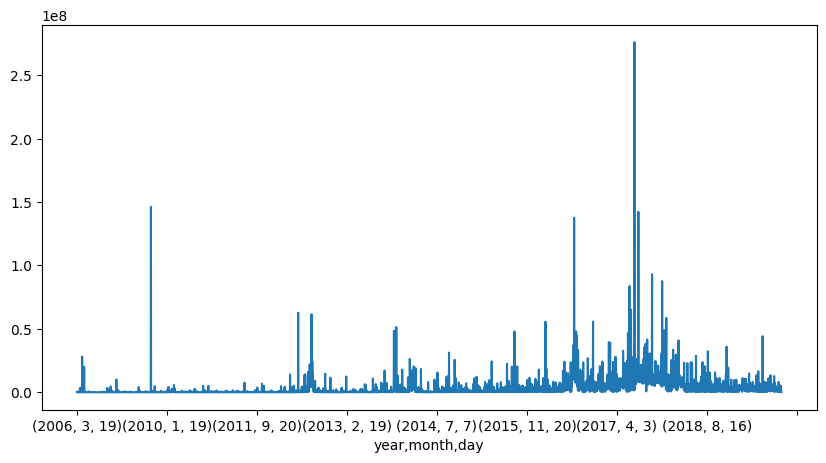

In [14]:
olympics_data = filtered_df[filtered_df['tags'].apply(lambda x: 'olympic' in x)].groupby(['year', 'month', 'day'])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))
olympics_data.plot()
plt.show()

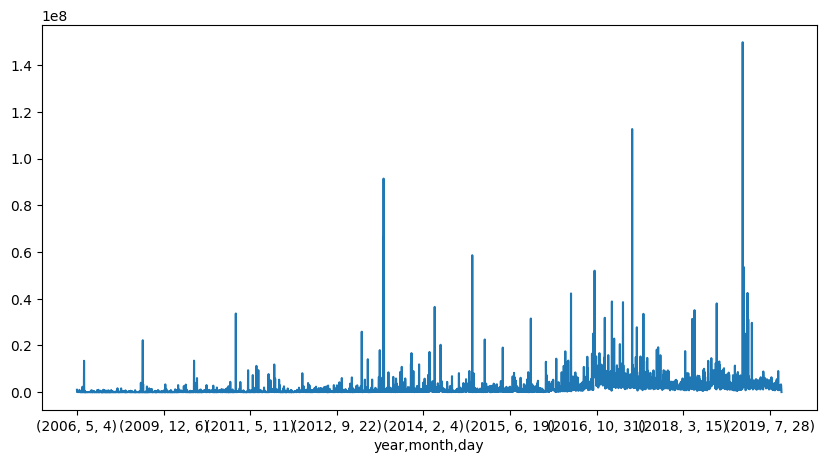

In [16]:
olympics_data = filtered_df[filtered_df['tags'].apply(lambda x: 'formula1' in x or 'f1' in x)].groupby(['year', 'month', 'day'])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))
olympics_data.plot()
plt.show()

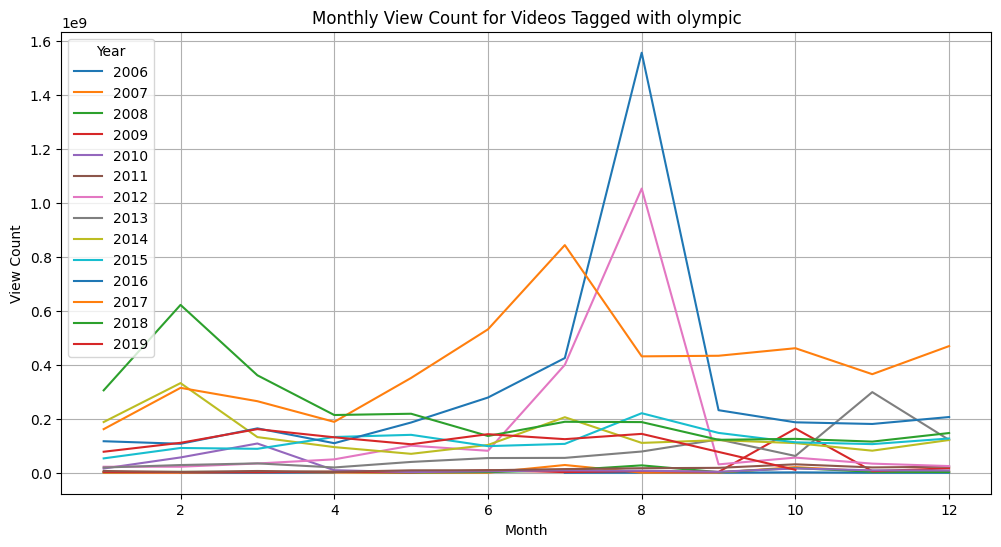

In [11]:
# Example usage
subjects = ['olympic']
plot_view_counts_by_subject(filtered_df, subjects)
# Find subjects in tags and titles combined

In [5]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)

# Initialize an empty list to store unique categories
all_unique_categories = []

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas()[['upload_date', 'view_count', 'like_count', 'dislike_count', 'tags', 'categories', 'title']]
    unique_categories = temp_df['categories'].explode().unique().tolist()
    all_unique_categories.extend(unique_categories)
    print(f"Current number of unique categories: {len(set(all_unique_categories))}")

# Print the combined list of unique categories
print(list(set(all_unique_categories)))

Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16
Current number of unique categories: 16


In [12]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)

# Initialize an empty DataFrame to store the filtered data
filtered_sport_df = pd.DataFrame()

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas().drop(columns=['description'])


    temp_df = temp_df[temp_df['categories'].apply(lambda x: 'Sports' in x)]
    filtered_sport_df = pd.concat([filtered_sport_df, temp_df], ignore_index=True)
    print(f"Current size of filtered_df: {filtered_sport_df.shape}")
    print(f"Memory usage of filtered_df: {filtered_sport_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")


Current size of filtered_df: (39043, 11)
Memory usage of filtered_df: 28.63 MB
Current size of filtered_df: (127601, 11)
Memory usage of filtered_df: 92.05 MB
Current size of filtered_df: (227935, 11)
Memory usage of filtered_df: 164.05 MB
Current size of filtered_df: (330546, 11)
Memory usage of filtered_df: 240.20 MB
Current size of filtered_df: (398329, 11)
Memory usage of filtered_df: 289.38 MB
Current size of filtered_df: (445440, 11)
Memory usage of filtered_df: 322.64 MB
Current size of filtered_df: (521208, 11)
Memory usage of filtered_df: 378.75 MB
Current size of filtered_df: (566623, 11)
Memory usage of filtered_df: 411.01 MB
Current size of filtered_df: (615978, 11)
Memory usage of filtered_df: 447.11 MB
Current size of filtered_df: (675919, 11)
Memory usage of filtered_df: 489.76 MB
Current size of filtered_df: (712831, 11)
Memory usage of filtered_df: 516.38 MB
Current size of filtered_df: (753833, 11)
Memory usage of filtered_df: 544.94 MB
Current size of filtered_df: (8

In [13]:
filtered_sport_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01 00:00:00,48737.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01 00:00:00,19999.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,78.0,Y1_pK68iSYQ,603,3305.0,"Catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28 00:00:00,58518.0
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,70.0,jF8TSo3ZfTc,1426,1889.0,"Fishing,Fishing uk,Angling,Sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21 00:00:00,71998.0
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,73.0,Gp00dNaVouo,990,2699.0,"Fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14 00:00:00,101924.0
...,...,...,...,...,...,...,...,...,...,...,...
4354407,Sports,UCrwEMKhsjY8P9-GuIKMYVrQ,2019-11-17 22:39:14.232693,7.0,Q9H_fk6uHDk,1121,89.0,"hypnosis,progressive hypnosis,meditation,calm,...",Play Better Golf Part 4 ★ Putting Precision ★ ...,2017-02-14 00:00:00,20430.0
4354408,Sports,UCrwEMKhsjY8P9-GuIKMYVrQ,2019-11-17 22:39:14.843290,13.0,3lwXzOboOzk,1341,91.0,"hypnosis,progressive hypnosis,calm,hypnotherap...",Play Better Golf Part 3 ★ Owning The Tee ★ Hyp...,2017-02-14 00:00:00,25817.0
4354409,Sports,UCrwEMKhsjY8P9-GuIKMYVrQ,2019-11-17 22:39:15.484430,19.0,242JzJuuG78,1098,115.0,"hypnosis,progressive hypnosis,meditation,calm,...",Play Better Golf Part 2 ★ Fairway and Approach...,2017-02-14 00:00:00,29909.0
4354410,Sports,UCrwEMKhsjY8P9-GuIKMYVrQ,2019-11-17 22:39:16.111873,28.0,CpMWSgoRwNI,1245,372.0,"hypnosis,progressive hypnosis,meditation,calm,...",Play Better Golf Part 1 ★ Getting In The Zone ...,2017-02-14 00:00:00,61980.0


In [14]:
filtered_sport_df.to_parquet("filtered_sport_category_without_description_column_metadata.parquet", engine="fastparquet")